In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Por favor altere o caminho do arquivo para realizar a leitura.
raw_data = pd.read_csv('C:\\Cientista de Dados\\Semantix\\bank\\bank-full.csv',sep=';')
dataBank = pd.DataFrame(raw_data)
dataBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#analisando o formato dos dados para trata-los antes de utilizar as tecnicas de predicao.
#Todas as colunas serao analisadas
dataBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#a primeira coluna analisada job
dataJob = dataBank['job'].value_counts()

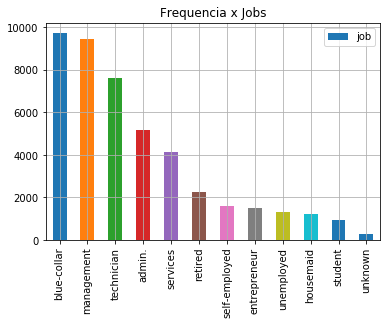

In [5]:
dataJob.plot(kind = "bar", grid = True, title = 'Frequencia x Jobs', legend = True)
plt.show()

In [6]:
#Copiamos o dataset para nao perder ou modificar as informacoes
#Utilizei duas tecnicas para trabalhar com o dado job - Binary Encoder e One Hot Encoder
#No final utilizei para todos one hot encoder
#tambem poderia utilizar outras tecnicas como label encoder, porem essa tecnica traz a desvantagem dos pesos, mas com a 
#vantagem de nao aumentar o numero de dimensoes
dataBankTran = dataBank.copy()
dataBankTran = pd.get_dummies(dataBankTran, columns=['job'], prefix = ['job'])
#encoder = ce.BinaryEncoder(cols=['job'])
#dataBankTran = encoder.fit_transform(dataBankTran)
dataBankTran.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,tertiary,no,2143,yes,no,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,29,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,no,2,yes,yes,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,no,1506,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,no,1,no,no,unknown,5,may,...,0,0,0,0,0,0,0,0,0,1


In [7]:
dataAge = dataBank['age']
dataAge.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [8]:
#Decidi aplicar logaritmo nessa base para evitar que dados tenham muito peso sobre os demais
dataBankTran['age'] = dataBankTran['age'].apply(np.log)
dataBankTran['age'].describe()

count    45211.000000
mean         3.679433
std          0.254577
min          2.890372
25%          3.496508
50%          3.663562
75%          3.871201
max          4.553877
Name: age, dtype: float64

In [9]:
#Aplicando one hot encoder
dataBankTran = pd.get_dummies(dataBankTran, columns=['marital'], prefix = ['marital'])
dataBankTran.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,4.060443,tertiary,no,2143,yes,no,unknown,5,may,261,...,0,0,0,0,0,0,0,0,1,0
1,3.784190,secondary,no,29,yes,no,unknown,5,may,151,...,0,0,0,0,1,0,0,0,0,1
2,3.496508,secondary,no,2,yes,yes,unknown,5,may,76,...,0,0,0,0,0,0,0,0,1,0
3,3.850148,unknown,no,1506,yes,no,unknown,5,may,92,...,0,0,0,0,0,0,0,0,1,0
4,3.496508,unknown,no,1,no,no,unknown,5,may,198,...,0,0,0,0,0,0,1,0,0,1


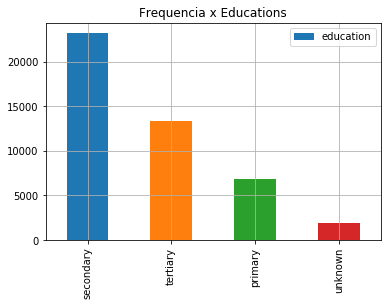

In [10]:
#aplicado one hot encoder
dataEducation = dataBank['education'].value_counts()
dataEducation.plot(kind = "bar", grid = True, title = 'Frequencia x Educations', legend = True)
plt.show()

In [11]:
dataBankTran = pd.get_dummies(dataBankTran, columns=['education'], prefix = ['education'])
dataBankTran.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,4.060443,no,2143,yes,no,unknown,5,may,261,1,...,0,0,0,0,1,0,0,0,1,0
1,3.784190,no,29,yes,no,unknown,5,may,151,1,...,1,0,0,0,0,1,0,1,0,0
2,3.496508,no,2,yes,yes,unknown,5,may,76,1,...,0,0,0,0,1,0,0,1,0,0
3,3.850148,no,1506,yes,no,unknown,5,may,92,1,...,0,0,0,0,1,0,0,0,0,1
4,3.496508,no,1,no,no,unknown,5,may,198,1,...,0,0,1,0,0,1,0,0,0,1


In [12]:
#transformando os dados para numerico porque utilizarei as tecnicas de regressao linear e regressao logistica
dataBankTran['default'] = np.where(dataBankTran['default'].str.contains('yes'), 1, 0)
dataBankTran.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,4.060443,0,2143,yes,no,unknown,5,may,261,1,...,0,0,0,0,1,0,0,0,1,0
1,3.784190,0,29,yes,no,unknown,5,may,151,1,...,1,0,0,0,0,1,0,1,0,0
2,3.496508,0,2,yes,yes,unknown,5,may,76,1,...,0,0,0,0,1,0,0,1,0,0
3,3.850148,0,1506,yes,no,unknown,5,may,92,1,...,0,0,0,0,1,0,0,0,0,1
4,3.496508,0,1,no,no,unknown,5,may,198,1,...,0,0,1,0,0,1,0,0,0,1


In [13]:
dataBalance = dataBank['balance']
dataBalance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [13]:
#Decidi aplicar logaritmo nessa base para evitar que dados tenham muito peso sobre os demais
dataBankTran['balance'] = dataBankTran['balance'].apply(lambda x: math.log(x) if x > 0 else (-1 * math.log(-1*x)) if x < 0 else 0)
dataBankTran.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,4.060443,0,7.669962,yes,no,unknown,5,may,261,1,...,0,0,0,0,1,0,0,0,1,0
1,3.784190,0,3.367296,yes,no,unknown,5,may,151,1,...,1,0,0,0,0,1,0,1,0,0
2,3.496508,0,0.693147,yes,yes,unknown,5,may,76,1,...,0,0,0,0,1,0,0,1,0,0
3,3.850148,0,7.317212,yes,no,unknown,5,may,92,1,...,0,0,0,0,1,0,0,0,0,1
4,3.496508,0,0.000000,no,no,unknown,5,may,198,1,...,0,0,1,0,0,1,0,0,0,1


In [14]:
dataBankTran['balance'].describe()

count    45211.000000
mean         4.878023
std          3.812000
min         -8.989569
25%          4.276666
50%          6.104793
75%          7.264030
max         11.533972
Name: balance, dtype: float64

In [15]:
#transformando os dados string para numericos
dataBankTran['housing'] = np.where(dataBankTran['housing'].str.contains('yes'), 1, 0)
dataBankTran.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,4.060443,0,7.669962,1,no,unknown,5,may,261,1,...,0,0,0,0,1,0,0,0,1,0
1,3.784190,0,3.367296,1,no,unknown,5,may,151,1,...,1,0,0,0,0,1,0,1,0,0
2,3.496508,0,0.693147,1,yes,unknown,5,may,76,1,...,0,0,0,0,1,0,0,1,0,0
3,3.850148,0,7.317212,1,no,unknown,5,may,92,1,...,0,0,0,0,1,0,0,0,0,1
4,3.496508,0,0.000000,0,no,unknown,5,may,198,1,...,0,0,1,0,0,1,0,0,0,1


In [16]:
#Transformando os dados string para numerico
dataBankTran['loan'] = np.where(dataBankTran['loan'].str.contains('yes'), 1, 0)
dataBankTran.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,4.060443,0,7.669962,1,0,unknown,5,may,261,1,...,0,0,0,0,1,0,0,0,1,0
1,3.784190,0,3.367296,1,0,unknown,5,may,151,1,...,1,0,0,0,0,1,0,1,0,0
2,3.496508,0,0.693147,1,1,unknown,5,may,76,1,...,0,0,0,0,1,0,0,1,0,0
3,3.850148,0,7.317212,1,0,unknown,5,may,92,1,...,0,0,0,0,1,0,0,0,0,1
4,3.496508,0,0.000000,0,0,unknown,5,may,198,1,...,0,0,1,0,0,1,0,0,0,1


In [17]:
#mais uma vez aplicado a tecnica de one hot encode
dataBankTran = pd.get_dummies(dataBankTran, columns=['contact'], prefix = ['contact'])
dataBankTran.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,4.060443,0,7.669962,1,0,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,3.784190,0,3.367296,1,0,5,may,151,1,-1,...,0,0,1,0,1,0,0,0,0,1
2,3.496508,0,0.693147,1,1,5,may,76,1,-1,...,0,1,0,0,1,0,0,0,0,1
3,3.850148,0,7.317212,1,0,5,may,92,1,-1,...,0,1,0,0,0,0,1,0,0,1
4,3.496508,0,0.000000,0,0,5,may,198,1,-1,...,0,0,1,0,0,0,1,0,0,1


In [18]:
#aqui tambem foi aplicado a tecnica one hot encode, tambem utilizei binary encode.
dataBankTran = pd.get_dummies(dataBankTran, columns=['day'], prefix = ['day'])
#encoder = ce.BinaryEncoder(cols=['day'])
#dataBankTran = encoder.fit_transform(dataBankTran)
dataBankTran.head()

,age,default,balance,housing,loan,month,duration,campaign,pdays,previous,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,4.060443,0,7.669962,1,0,may,261,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.784190,0,3.367296,1,0,may,151,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.496508,0,0.693147,1,1,may,76,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,3.850148,0,7.317212,1,0,may,92,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.496508,0,0.000000,0,0,may,198,1,-1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
dataBankTran = pd.get_dummies(dataBankTran, columns=['month'], prefix = ['month'])
#encoder = ce.BinaryEncoder(cols=['month'])
#dataBankTran = encoder.fit_transform(dataBankTran)
dataBankTran.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,4.060443,0,7.669962,1,0,261,1,-1,0,unknown,...,0,0,0,0,0,0,1,0,0,0
1,3.784190,0,3.367296,1,0,151,1,-1,0,unknown,...,0,0,0,0,0,0,1,0,0,0
2,3.496508,0,0.693147,1,1,76,1,-1,0,unknown,...,0,0,0,0,0,0,1,0,0,0
3,3.850148,0,7.317212,1,0,92,1,-1,0,unknown,...,0,0,0,0,0,0,1,0,0,0
4,3.496508,0,0.000000,0,0,198,1,-1,0,unknown,...,0,0,0,0,0,0,1,0,0,0


In [20]:
#esse atributo foi retirado conforme texto da fonte dos dados.
dataBankTran = dataBankTran.drop(['duration'], axis = 1)
dataBankTran.head()

,age,default,balance,housing,loan,campaign,pdays,previous,poutcome,y,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,4.060443,0,7.669962,1,0,1,-1,0,unknown,no,...,0,0,0,0,0,0,1,0,0,0
1,3.784190,0,3.367296,1,0,1,-1,0,unknown,no,...,0,0,0,0,0,0,1,0,0,0
2,3.496508,0,0.693147,1,1,1,-1,0,unknown,no,...,0,0,0,0,0,0,1,0,0,0
3,3.850148,0,7.317212,1,0,1,-1,0,unknown,no,...,0,0,0,0,0,0,1,0,0,0
4,3.496508,0,0.000000,0,0,1,-1,0,unknown,no,...,0,0,0,0,0,0,1,0,0,0


In [21]:
#tambem aplicado o logaritmo para diminuir o peso de valores muito alto.
dataBankTran['campaign'] = dataBankTran['campaign'].apply(np.log)
dataBankTran['campaign'].describe()

count    45211.000000
mean         0.706819
std          0.712172
min          0.000000
25%          0.000000
50%          0.693147
75%          1.098612
max          4.143135
Name: campaign, dtype: float64

In [22]:
'''dataBankTran['pdays'] = dataBankTran['pdays'].replace(-1,999)'''
dataBankTran['pdays'] = dataBankTran['pdays'].apply(np.log)
dataBankTran['pdays'] = dataBankTran['pdays'].apply(lambda x: math.log(x) if x > 0 else (-1 * math.log(-1*x)) if x < 0 else 0)
dataBankTran['pdays'].describe()

count    45211.000000
mean         0.299199
std          0.639458
min         -0.366513
25%          0.000000
50%          0.000000
75%          0.000000
max          1.912448
Name: pdays, dtype: float64

In [23]:
dataBankTran['previous'] = dataBankTran['previous'].apply(lambda x: math.log(x) if x > 0 else (-1 * math.log(-1*x)) if x < 0 else 0)
dataBankTran['previous'].describe()

count    45211.000000
mean         0.149664
std          0.451112
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.616771
Name: previous, dtype: float64

In [24]:
#encoder = ce.BinaryEncoder(cols=['poutcome'])
#dataBankTran = encoder.fit_transform(dataBankTran)
dataBankTran = pd.get_dummies(dataBankTran, columns=['poutcome'], prefix = ['poutcome'])
dataBankTran.head()

,age,default,balance,housing,loan,campaign,pdays,previous,y,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,4.060443,0,7.669962,1,0,0.0,0.0,0.0,no,0,...,0,0,1,0,0,0,0,0,0,1
1,3.784190,0,3.367296,1,0,0.0,0.0,0.0,no,0,...,0,0,1,0,0,0,0,0,0,1
2,3.496508,0,0.693147,1,1,0.0,0.0,0.0,no,0,...,0,0,1,0,0,0,0,0,0,1
3,3.850148,0,7.317212,1,0,0.0,0.0,0.0,no,0,...,0,0,1,0,0,0,0,0,0,1
4,3.496508,0,0.000000,0,0,0.0,0.0,0.0,no,0,...,0,0,1,0,0,0,0,0,0,1


In [25]:
dataBankTran['y'] = np.where(dataBankTran['y'].str.contains('yes'), 1, 0)
dataBankTran.head()

,age,default,balance,housing,loan,campaign,pdays,previous,y,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,4.060443,0,7.669962,1,0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,3.784190,0,3.367296,1,0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,3.496508,0,0.693147,1,1,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,3.850148,0,7.317212,1,0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,3.496508,0,0.000000,0,0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [26]:
dataBankTran.head()

,age,default,balance,housing,loan,campaign,pdays,previous,y,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,4.060443,0,7.669962,1,0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,3.784190,0,3.367296,1,0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,3.496508,0,0.693147,1,1,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,3.850148,0,7.317212,1,0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,3.496508,0,0.000000,0,0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [27]:
#metodo para normalizar os dados e evitem distorcoes nos dados
#utilizei os metodos abaixo para verificar a influencia dos mesmos nos dados, porem o pre processamento sem essas normalizacoes
#foi possivel obter um score maior
#Nesta funcao ha tres metodos que podem ser utilizados MinMax, Z-Score, Constant
def normalize(method, data):
    
    for x in range(len(data)):
        for y in data.columns:
            
            #metodo MinMax
            if method == 'MinMax':
                if (data[y].max() - data[y].min()) > 0:
                    data.at[x,y] = (data.at[x,y] - data[y].min())/(data[y].max() - data[y].min())
                else: 
                    data.at[x,y] = 0
            
            #metodo Z-score
            if method == 'Z-Score':
                data.at[x,y] = (data.at[x,y] - data[y].mean())/data[y].std()
            
            #metodo Constant
            if method == 'Constant':
                constant = 10**len(str(round(data[y].max())))
                if constant > 0:
                    data.at[x,y] = data.at[x,y] / constant
                else:
                    data.at[x,y] = 0;
                
    return data

In [28]:
def missingValues(method, data, value):
    
    #metodo criado para quando há dados faltantes
    if method == 'Average':
        data = data.replace(value, np.nan)
        data = data.apply(pd.to_numeric, downcast='float')
        data.fillna(data.mean(), inplace=True)
    
    return data

In [29]:
# metodo criado para retornar a matriz de confusao dos treinamentos de dados na regressao linear
def trainingScore(Wtrain, Xtrain, Ytrain):
    count = TP = TN = FP = FN = 0
    for i in range(len(Ytrain)):
        value = round(np.matmul(Wtrain,Xtrain.loc[i]))

        if value == Ytrain.loc[i]:
            count = count + 1
            if value == 1:
                TP = TP + 1
            if value == 0:
                TN = TN + 1
        if value != Ytrain.loc[i]:
            if value == 1:
                FP = FP + 1
            if value == 0:
                FN = FN + 1
        
    matrixConfusion = pd.DataFrame(data = [('TN: ' + str(TN), 'FP: ' + str(FP)), ('FN: ' + str(FN), 'TP: ' + str(TP))], 
                                   index = ['Actual NO', 'Actual YES'], columns = ['Predict No', 'Predict Yes'])
    
    print('Score Training: %0.2f' % (count/len(Ytrain)))
    
    return matrixConfusion

In [30]:
#metodo criado que cacula a matriz pseudo inversa e retorna o vetor de parametros do treinamento que serao utilizados
#para classificacao
def training(Xtrain, Ytrain):
    XPSInvTrain = np.linalg.pinv(Xtrain)
    Wtrain = np.matmul(XPSInvTrain, Ytrain)
    matrixConfusionTraining = trainingScore(Wtrain, Xtrain, Ytrain)
    
    print(matrixConfusionTraining)
    
    return Wtrain

In [31]:
# metodo criado para retornar a matriz de confusao da classificacao da regressao linear
def test(W, Xtest, Ytest):
    count = TP = TN = FP = FN = 0
    index = Ytest.index
    start = index[0]
    final = index[-1]

    matrixA = np.matmul(Xtest, W)
    print(matrixA)
    for i in range(start, final):
        value = round(matrixA[i])
        
        if value == Ytest.loc[i]:
            count = count + 1
            if value == 1:
                TP = TP + 1
            if value == 0:
                TN = TN + 1
        if value != Ytest.loc[i]:
            if value == 1:
                FP = FP + 1
            if value == 0:
                FN = FN + 1
        
    matrixConfusion = pd.DataFrame(data = [('TN: ' + str(TN), 'FP: ' + str(FP)), ('FN: ' + str(FN), 'TP: ' + str(TP))], 
                                   index = ['Actual NO', 'Actual YES'], columns = ['Predict No', 'Predict Yes'])
    
    print('Score Test: %0.2f' % (count/len(Ytest))) 
    
    return matrixConfusion   

In [32]:
#metodo criado para embaralhar os dados do conjunto de dados
def shuffleData(data, numberTries):
    for i in range(numberTries):
        randomOne = random.randint(0,len(data) - 1)
        randomTwo = random.randint(0,len(data) - 1)
        rowOne = data.iloc[randomOne]
        rowTwo = data.iloc[randomTwo]
        data.at[randomOne] = rowTwo
        data.at[randomTwo] = rowOne
        
    return data

In [33]:
#metodo criado para dividir os dados em treinamento e testes os parametros passados sao a porcentagem e o conjunto de dados.
def splitTestTraining(data, percentage):
    rows, columns = data.shape
    rowsTrain = round(rows*percentage/100)
    newData = pd.DataFrame()
    newData = data[:rowsTrain]
    
    return newData

In [34]:
#metodo criado para definir o conjunto y da regressao logistica, como foi utilizado a funcao sigmoide passei os dados 1 e -1
def outputClass(Class):
    
    for i in range(len(Class)):
        if Class[i] == 0:
            Class[i] = -1
        else:
            Class[i] = 1
        
    return Class

In [35]:
#metodo criado para encontrar o minimo global ou local
#tenho que melhorar esse metodo para enviar o vetor de parametros iniciais 
#muitas vezes o parametro inicial influi, atualmente esta randomico e preso nessa funcao
#perceba que a linha comentada abaixo iniciava todos com zero, testei alguns pontos iniciais diferentes
def gradientDescent(Xtrain, Ytrain, epsilon, eta, numberIter):
    t = 0
    N = len(Xtrain)
    '''Wtrain = pd.DataFrame(0, index=range(1), columns=range(len(Xtrain.columns)))'''
    Wtrain = np.matrix(np.random.uniform(low=-1, high=1, size=((len(Xtrain.columns)))))
    v = v1 = 0
    while t < numberIter:
        r = g = 0
        for i in range(N):
            x = np.matrix(Xtrain.iloc[i])
            xt = x.transpose()
            numerador = Ytrain.iloc[i]*x
            dividendo1 = Ytrain.iloc[i]*Wtrain
            dividendo2 = np.matmul(dividendo1, xt)
            dividendo3 = math.exp(dividendo2)
            dividendo4 = 1 + dividendo3
            divisao = numerador / dividendo4
            
            r = r + divisao
            
            
            '''Calculo Erro'''
            expo1 = -1*dividendo2
            s1 = (1+math.exp(expo1))
            u = math.log(s1)
            g = g + u
            
        v = -1*(1/N*(r))
        v1 = 1/N*(g)
        #Caso queira verificar se a funcao esta convergindo para o minimo, por favor, tire o comentario das duas linhas abaixo.
        #print('T: %d' %t)
        #print('V1: %0.2f' %v1)
        if(v1 >= epsilon):
            h = eta*v
            Wtrain = Wtrain - h
        else:
            break

        t = t + 1
        
    return Wtrain, v1, t

In [36]:
#traz o score e a matriz de confusao do treinamento logistico
def trainingScoreLogistic(Wtrain, Xtrain, Ytrain):
    count = TP = TN = FP = FN = 0
    for i in range(len(Ytrain)):
        value = (1/(1+math.exp(-1*(np.matmul(Wtrain,Xtrain.loc[i])))))
        '''value = np.matmul(Wtrain,Xtrain.loc[i])'''
        if value >= 0.5 and Ytrain.loc[i] == 1:
            count = count + 1
            TP = TP + 1
        if value < 0.5 and Ytrain.loc[i] == -1:
            count = count + 1
            TN = TN + 1
        if value >= 0.5 and Ytrain.loc[i] == -1:
            FP = FP + 1
        if value < 0.5 and Ytrain.loc[i] == 1:
            FN = FN + 1
            
    matrixConfusion = pd.DataFrame(data = [('TN: ' + str(TN), 'FP: ' + str(FP)), ('FN: ' + str(FN), 'TP: ' + str(TP))], 
                                   index = ['Actual NO', 'Actual YES'], columns = ['Predict No', 'Predict Yes'])
    
    print('Score Training: %0.2f' % (count/len(Ytrain)))
    
    return matrixConfusion

In [37]:
#traz o score e a matriz de confusao da classificacao logistico
def testLogistic(W, Xtest, Ytest):
    count = TP = TN = FP = FN = 0
    index = Ytest.index
    start = index[0]
    final = index[-1]

    for i in range(start, final):
        value = (1/(1+math.exp(-1*(np.matmul(W,Xtrain.loc[i])))))
        '''value = np.matmul(Wtrain,Xtrain.loc[i])'''
        if value >= 0.5 and Ytest.loc[i] == 1:
            count = count + 1
            TP = TP + 1
        if value < 0.5 and Ytest.loc[i] == -1:
            count = count + 1
            TN = TN + 1
        if value >= 0.5 and Ytest.loc[i] == -1:
            FP = FP + 1
        if value < 0.5 and Ytest.loc[i] == 1:
            FN = FN + 1
        
    matrixConfusion = pd.DataFrame(data = [('TN: ' + str(TN), 'FP: ' + str(FP)), ('FN: ' + str(FN), 'TP: ' + str(TP))], 
                                   index = ['Actual NO', 'Actual YES'], columns = ['Predict No', 'Predict Yes'])
    
    print('Score Test: %0.2f' % (count/len(Ytest))) 
    
    return matrixConfusion

In [38]:
dataBankTranShuffled = shuffleData(dataBankTran, 9000)

In [39]:
#Separando os dados de classificacao e teste
dataBankTranTrain = splitTestTraining(dataBankTranShuffled, 67)
dataBankTranTest = dataBankTranShuffled[~dataBankTranShuffled.index.isin(dataBankTranTrain.index)]

In [40]:
#Separando as variaveis dependentes e as indepentes ou atributos e resultado.
dataBankTranTrain = dataBankTranTrain.reset_index(drop=True)
Xtrain = dataBankTranTrain.loc[:, dataBankTranTrain.columns != 'y']
#Xtrain = normalize('MinMax', Xtrain)
#Xtrain = normalize('Z-Score', Xtrain)
#Xtrain = normalize('Constant', Xtrain)
Ytrain = dataBankTranTrain['y']

In [41]:
#chamada da regressao linear que traz o vetor de parametros
W = training(Xtrain, Ytrain)

Score Training: 0.94
           Predict No Predict Yes
Actual NO   TN: 28316      FP: 51
Actual YES   FN: 1842      TP: 82


In [42]:
#impressao do vetor de parametros
W

array([-0.01509073,  0.01035339,  0.00211508, -0.01531185, -0.01354824,
       -0.00762522,  0.01237389,  0.00772767,  0.01605361,  0.01929085,
        0.01948532, -0.00768842,  0.01186207,  0.0342381 ,  0.02017481,
        0.01473302,  0.0362957 ,  0.01246803,  0.02513717,  0.01996797,
        0.08384684,  0.0588899 ,  0.07928148,  0.05200918,  0.05543094,
        0.06087597,  0.05370215,  0.10153983,  0.08553239,  0.03494601,
        0.06184209,  0.00540598, -0.00267256,  0.00447969,  0.00622328,
        0.00792905, -0.0045676 ,  0.00160002, -0.00197447,  0.02372313,
        0.01401115,  0.03196394,  0.03144386,  0.01082573,  0.02423075,
        0.01896564, -0.02259545, -0.00458396, -0.01877983, -0.0143077 ,
       -0.00165665, -0.0030039 ,  0.00796741,  0.00624744,  0.01819985,
        0.01371653, -0.00109871, -0.00617154, -0.01496397,  0.03473177,
       -0.00511275, -0.00055229, -0.11441042,  0.03843377, -0.08615722,
       -0.1380857 , -0.10500394, -0.05933867,  0.29236666, -0.08

In [43]:
#Separando X e Y dos dados de testes
dataBankTranTest = dataBankTranTest.reset_index(drop=True)
Xtest = dataBankTranTest.loc[:, dataBankTranTest.columns != 'y']
#Xtest = normalize('MinMax', Xtest)
#Xtest = normalize('Z-Score', Xtest)
#Xtest = normalize('Constant', Xtest)
Ytest = dataBankTranTest['y']

In [45]:
#Imprimindo a matriz de confusao e tambem o vetor de parametros
matrixConfusionTest = pd.DataFrame()
matrixConfusionTest = test(W, Xtest, Ytest)
matrixConfusionTest

[0.026981   0.12817418 0.07178736 ... 0.43733763 0.04213886 0.06417984]
Score Test: 0.78


,Predict No,Predict Yes
Actual NO,TN: 11136,FP: 333
Actual YES,FN: 2891,TP: 559


In [46]:
#Reclassificando a variavel Y para ser utilizado na regressao logistica
YtrainLog = outputClass(Ytrain)
YtestLog = outputClass(Ytest)

In [47]:
#Chamada da funcao gradiente descendente que funciona de forma iterativa e procura pelo minimo local ou global, provavel local.
#Ela retorna o erro e tambem o numero de iteracoes e tambem o vetor de parametros
Wlog, erro, t = gradientDescent(Xtrain, YtrainLog, 0.001, 0.9, 50)
'''W, erro, t =gradientDescent(Xtrain, Ytrain, 0.38, 0.01, 2000)'''
print('Erro encontrado: %0.2f' % erro)
print('Numero de Interacoes: %d' % t)
print('W - Encontrado: ')
Wlog

Erro encontrado: 0.31
Numero de Interacoes: 50
W - Encontrado: 


matrix([[-0.94843727, -0.04921777,  0.13911724, -0.27866902, -0.45186474,
         -0.3527198 , -0.11596021,  0.36958252,  0.61622638,  0.81815934,
          0.62323287,  0.63479346,  0.82022196, -0.28734957, -0.60002315,
          0.11495031,  0.55791819, -0.14375535, -0.5011679 , -0.28024265,
          0.51711279, -0.5745841 , -0.04512628, -0.84581565, -0.08999357,
         -0.77961641,  0.32515305,  0.54078921,  0.38438207, -0.53578844,
         -0.83135971,  0.1034519 ,  0.24873471, -0.7447559 ,  0.24145922,
          0.7535955 , -0.36346968,  0.50116331,  0.09872536,  0.10530613,
          0.6513016 , -0.0470128 ,  0.04930802,  0.78202746, -0.36140867,
          0.64969597,  0.31087771,  0.27656115, -0.09802615, -0.93134417,
          0.52641275, -0.20057911, -0.12876506, -0.28582372, -0.39440638,
          0.61985057, -0.54127286,  0.24492264, -0.79158422,  0.86527663,
         -0.00160814, -0.63809057,  0.71452708,  0.64289739, -0.5877117 ,
          0.47792408,  0.52021258,  0.

In [48]:
#Matriz de Confusao da regressao logistica (Treinamento)
matrixConfusion = trainingScoreLogistic(Wlog, Xtrain, YtrainLog)
matrixConfusion

Score Training: 0.93


,Predict No,Predict Yes
Actual NO,TN: 28159,FP: 208
Actual YES,FN: 1884,TP: 40


In [49]:
#Matriz de Confusao da regressao logistica (Teste)
matrixConfusionTest = pd.DataFrame()
matrixConfusionTest = testLogistic(Wlog, Xtest, YtestLog)
matrixConfusionTest

Score Test: 0.77


,Predict No,Predict Yes
Actual NO,TN: 11429,FP: 40
Actual YES,FN: 3431,TP: 19


In [ ]:
#As funcoes de regressao logistica e regressao linear tiveram desempenho muito parecidos
#Por falta de tempo nao implemente a KNN para comparar os resultados com a regressao linear e regressao logistica
#Para melhorar o desempenho da predicao pensei em trabalhar com uma maior quantidade de dados no treinamento dos dados em 
#que y = 1 Para ter um acerto maior
#Implementar tambem o metodo de Newthon para achar o gradiente, mesmo sabendo que para o calculo da Hessiana exige bastante
#da maquina.